# Analyzing Russian Troll Tweets

This notebook will provide a basic analysis of Russian troll tweet data.

## Initialization

### Import dependencies

In [1]:
# Local
import os
from collections import Counter

# 3rd Party
import matplotlib.pyplot as plt
import wordcloud

# Custom
import utilities.data
from tweet.tweet import Tweet

### Define globals
Set test to ```True``` to limit the data read to a certain number of files, defined by ```test_files_to_read```.

In [2]:
test = True
test_files_to_read = 4

### Read in data
Store data as a list of dicts in ```data```.

In [3]:
data = list()
for i, f in enumerate(os.listdir("data")):
    print(f"Reading {f}")
    data += utilities.data.read_csv_as_list_of_dicts("data/" + f)
    if test:
        if i >= (test_files_to_read - 1):
            break

Reading IRAhandle_tweets_1.csv
Reading IRAhandle_tweets_9.csv
Reading IRAhandle_tweets_2.csv
Reading IRAhandle_tweets_4.csv


Convert the list of dicts to a list of Tweet objects

In [4]:
tweets = [Tweet(tweet) for tweet in data]
print("\nSample tweet data")
print(tweets[0])


Sample tweet data
External Author ID: 906000000000000000
Author: 10_GOP
Content: "We have a sitting Democrat US Senator on trial for corruption and you've barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC
Region: Unknown
Language: English
Publish Date: 10/1/2017 19:58
Harvested Date: 10/1/2017 19:59
Following: 1052
Followers: 9636
Updates: 253
Post Type: 
Account Type: Right
Retweet: 0
Account Category: RightTroll
New June 2018: 0
Alternative External ID: 905874659358453760
Tweet ID: 914580356430536707
Article URL: http://twitter.com/905874659358453760/statuses/914580356430536707
TCO1 Step 1:https://twitter.com/10_gop/status/914580356430536707/video/1
TCO2 Step 1:
TCO3 Step 1:



## Analysis
This section will be used to analyze the data among different sub-categories
### All Tweets Unfiltered
#### Total Languages Used

In [5]:
languages = Counter([t.language for t in tweets])
print(f"\nTotal languages used: {len(languages.keys())}")


Total languages used: 52


#### Most Popular Languages

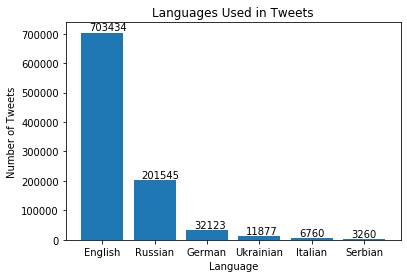

In [6]:
languages_to_plot = 6
most_common_languages = languages.most_common(languages_to_plot)
language, count = zip(*most_common_languages)
figure, axes = plt.subplots()
axes.bar(language, count)
plt.title("Languages Used in Tweets")
plt.xlabel("Language")
plt.ylabel("Number of Tweets")
for i, v in enumerate(count):  # Used to plot values; centering imperfect
    plt.text(i - 0.25, v + (max(count) * 0.01), str(v))

#### Most Followers Reached
Measured by most followers of a troll account

In [7]:
tweets.sort(key=lambda x: int(x.followers), reverse=True)
highest_followed = tweets[0]
print(f"\nMax followers reached: {highest_followed.followers}")


Max followers reached: 251276


#### Most Popular Accounts
Measued by number of followers

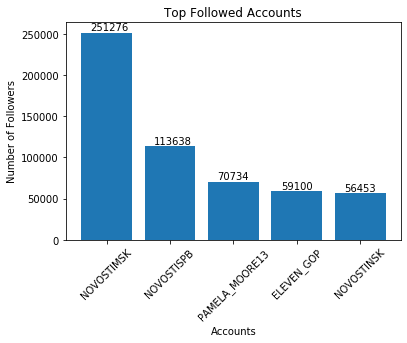

In [8]:
authors = list()
followers = list()
for t in tweets:
    if len(authors) == 5:
        break
    if t.author not in authors:
        authors.append(t.author)
        followers.append(int(t.followers))
figure, axes = plt.subplots()
axes.bar(authors, followers)
plt.xticks(rotation=45)
plt.title("Top Followed Accounts")
plt.xlabel("Accounts")
plt.ylabel("Number of Followers")
for i, v in enumerate(followers):  # Used to plot values; centering imperfect
    plt.text(i - 0.25, v + (max(followers) * 0.01), str(v))

### English Language Tweets

In [9]:
english_tweets = list(filter(lambda x: x.language == "English", tweets))
print(f"\nPerforming analysis on {len(english_tweets)} English tweets")


Performing analysis on 703434 English tweets


#### Most English Followers Reached

In [10]:
highest_followed_english = english_tweets[0]
print(f"\nMax English followers reached: {highest_followed_english.followers}")


Max English followers reached: 206686


#### Most Popular Accounts with at least 1 English Language Tweet

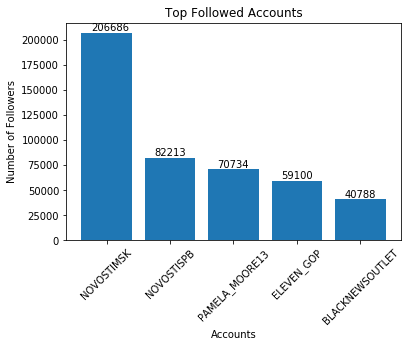

In [11]:
english_authors = list()
english_followers = list()
for t in english_tweets:
    if len(english_authors) == 5:
        break
    if t.author not in english_authors:
        english_authors.append(t.author)
        english_followers.append(int(t.followers))
figure, axes = plt.subplots()
axes.bar(english_authors, english_followers)
plt.xticks(rotation=45)
plt.title("Top Followed Accounts")
plt.xlabel("Accounts")
plt.ylabel("Number of Followers")
for i, v in enumerate(english_followers):  # Used to plot values; centering imperfect
    plt.text(i - 0.25, v + (max(english_followers) * 0.01), str(v))

### Words Used
Words analysis will currently only use English language tweets, as I am an English speaker and don't have the current ability to analyze other languages with proper filtering and data cleaning applied.

Get the individual words used. Clean out common words, filter for capitalization and punctuation, etc.

In [12]:
tweet_content = [t.content for t in english_tweets]
words = list()
for tweet in tweet_content:
    for word in tweet.split(" "):
        words.append(word)
words = utilities.data.clean_words_list(words)

#### Most Frequently used words in tweets
Excludes hashtags, which are plotted separately

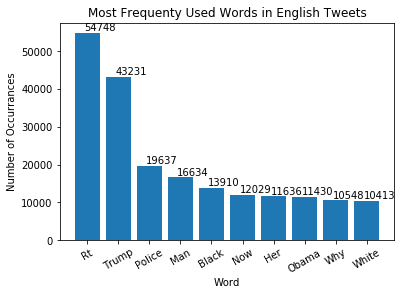

In [13]:
words_nonhashtags = list(filter(lambda x: x[0] != "#", words))
word_count = Counter(words_nonhashtags)
most_common_words = word_count.most_common(10)
word, word_count_int = zip(*most_common_words)
word = [w.title() for w in word]
figure, axes = plt.subplots()
axes.bar(word, word_count_int)
plt.xticks(rotation=30)
plt.title("Most Frequenty Used Words in English Tweets")
plt.xlabel("Word")
plt.ylabel("Number of Occurrances")
for i, v in enumerate(word_count_int):  # Used to plot values; centering imperfect
    plt.text(i - 0.1, v + (max(word_count_int) * 0.01), str(v))

#### Generate a WordCloud of Words Used in Tweets

(-0.5, 999.5, 499.5, -0.5)

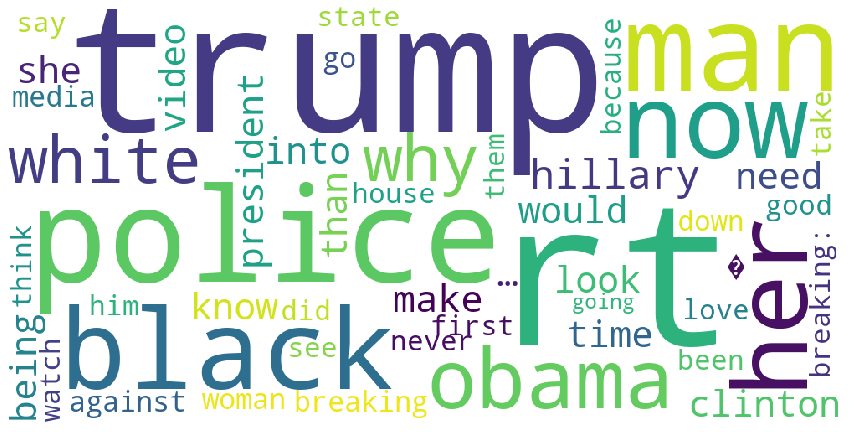

In [14]:
cloud = wordcloud.WordCloud(width = 1000, height = 500, max_words=50, background_color="white").\
generate_from_frequencies(word_count)
plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis("off")

#### Most Frequently Used Hashtags in Tweets
Capitalization filtered

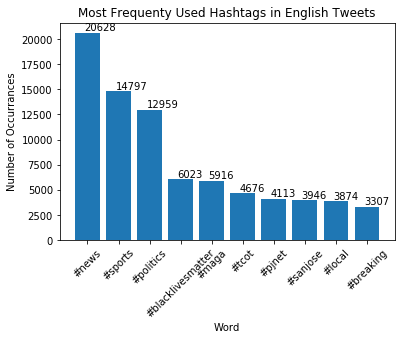

In [19]:
hashtags = list(filter(lambda x: x[0] == "#", words))
hashtag_count = Counter(hashtags)
most_common_hashtags = hashtag_count.most_common(10)
hashtag, hashtag_count_int = zip(*most_common_hashtags)
figure, axes = plt.subplots()
axes.bar(hashtag, hashtag_count_int)
plt.xticks(rotation=45)
plt.title("Most Frequenty Used Hashtags in English Tweets")
plt.xlabel("Word")
plt.ylabel("Number of Occurrances")
for i, v in enumerate(hashtag_count_int):  # Used to plot values; centering imperfect
    plt.text(i - 0.1, v + (max(hashtag_count_int) * 0.01), str(v))

#### Generate a Wordcloud of Hashtags Used in Tweets

(-0.5, 999.5, 499.5, -0.5)

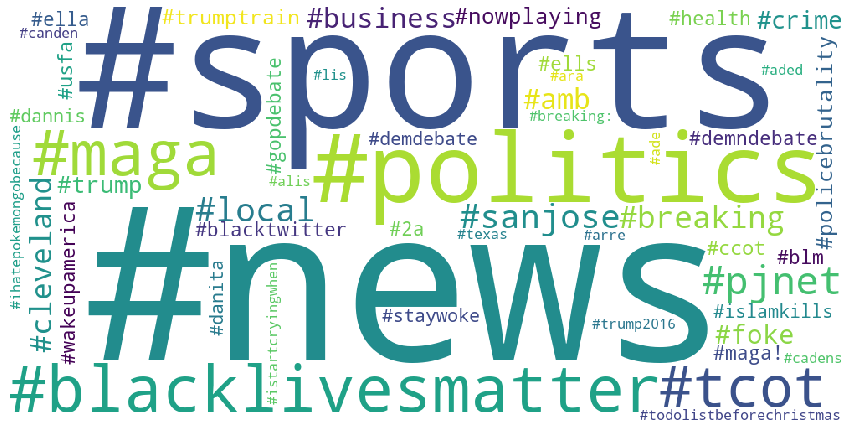

In [21]:
hashcloud = wordcloud.WordCloud(width = 1000, height = 500, max_words=50, background_color="white").\
generate_from_frequencies(hashtag_count)
plt.figure(figsize=(15,8))
plt.imshow(hashcloud)
plt.axis("off")

## Findings
### Hashtags
It's interesting to see #blacklivesmatter have more popularity than #MAGA. Wonder if these are pro or anti BLM tweets.